##Установка необходимых библиотек

In [ ]:
!pip install openvino==2022.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.8/26.8 MB 15.0 MB/s eta 0:00:00


In [ ]:
!pip install openvino-dev==2022.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.9/305.9 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.1 

In [ ]:
!pip install openvino-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for openvino-colab: filename=openvino_colab-3.1.4-py3-none-any.whl size=3669 sha256=813e6fe3abda15813d991c0d7c5fa2b24051bd75e8043be08a1bc432537c281c
  Stored in directory: /root/.cache/pip/wheels/22/57/02/fd4428579c222b376b2572355d6762137b8156296da2a7e077
Successfully built openvino-colab


## Установка OpenVINO

In [ ]:
import openvino_colab
#from openvino_colab import server
#server()

Installed OpenVINO Dependencies. Installing OpenVINO...
ENV Variables Set!
Please enter the Choice of framework you want to work with:

(Note: You should only install for the ones you would be using.
Incase of needing to install for more than one but not all, rerun this cell and 
install the pre-requisites one by one.)

1 tf
2 mxnet
3 onnx
4 kaldi
5 all
Please enter your choice (Default Option - 5): 1
Choice is 1.0 : tf


Intel OpenVINO Installation Finished!


## Настройка окружения

In [ ]:
!source /opt/intel/openvino_2021/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


## Скачивание модели

In [ ]:
import sys
from pathlib import Path
from IPython.display import Markdown, display
base_model_dir = Path("~/open_model_zoo_models").expanduser()
omz_cache_dir = Path("~/open_model_zoo_cache").expanduser()
precision = "FP16"

In [ ]:
model_name1 = 'face-detection-retail-0004'
download_command = (
    f"omz_downloader --name {model_name1} --output_dir {base_model_dir} --cache_dir {omz_cache_dir}"
)
display(Markdown(f"Download command: `{download_command}`"))
display(Markdown(f"Downloading {model_name1}..."))
! $download_command

Download command: `omz_downloader --name face-detection-retail-0004 --output_dir /root/open_model_zoo_models --cache_dir /root/open_model_zoo_cache`

Downloading face-detection-retail-0004...

################|| Downloading face-detection-retail-0004 ||################

========== Downloading /root/open_model_zoo_models/intel/face-detection-retail-0004/FP32/face-detection-retail-0004.xml
... 100%, 125 KB, 462 KB/s, 0 seconds passed

========== Downloading /root/open_model_zoo_models/intel/face-detection-retail-0004/FP32/face-detection-retail-0004.bin
... 100%, 2297 KB, 2870 KB/s, 0 seconds passed

========== Downloading /root/open_model_zoo_models/intel/face-detection-retail-0004/FP16/face-detection-retail-0004.xml
... 100%, 160 KB, 408 KB/s, 0 seconds passed

========== Downloading /root/open_model_zoo_models/intel/face-detection-retail-0004/FP16/face-detection-retail-0004.bin
... 100%, 1148 KB, 1727 KB/s, 0 seconds passed

========== Downloading /root/open_model_zoo_models/intel/face-detection-retail-0004/FP16-INT8/face-detection-retail-0004.xml
... 100%, 273 KB, 689 KB/s, 0 seconds passed

========== Downloading /root/open_model_zoo_models/intel/face-detection-retail-0004

##Запуск модели

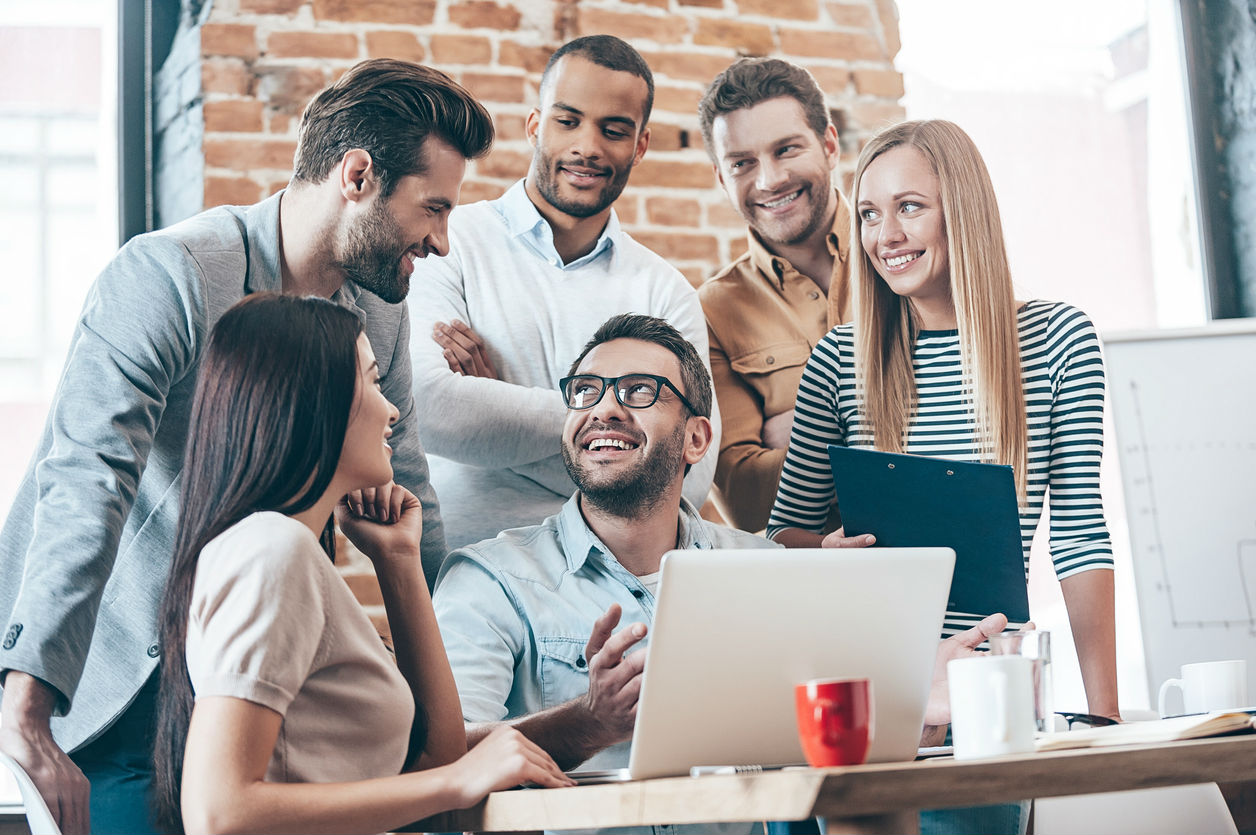

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread("happy-1.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
import cv2
from openvino.inference_engine import IENetwork, IECore

# Загрузка модели
model_xml = "/root/open_model_zoo_models/intel/face-detection-retail-0004/FP16/face-detection-retail-0004.xml"
model_bin = "/root/open_model_zoo_models/intel/face-detection-retail-0004/FP16/face-detection-retail-0004.bin"
ie = IECore()
net = ie.read_network(model=model_xml, weights=model_bin)
exec_net = ie.load_network(network=net, device_name="CPU")
input_info = net.input_info
input_blob = next(iter(input_info))

# Настройка входных и выходных данных

b, c, h, w = [1, 3, 300, 300]
image = cv2.imread('happy-1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (w, h))
image = image.transpose((2, 0, 1))
image = image.reshape((b, c, h, w))

# Запуск модели
output_name = next(iter(net.outputs))
result = exec_net.infer(inputs={input_blob: image})

In [ ]:
result['detection_out']

array([[[[0.        , 1.        , 0.9999881 , ..., 0.41428965,
          0.54267806, 0.5871901 ],
         [0.        , 1.        , 0.99995124, ..., 0.12088402,
          0.65298617, 0.2841922 ],
         [0.        , 1.        , 0.9998784 , ..., 0.18478206,
          0.75537544, 0.3433536 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [ ]:
import pandas as pd

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame(result['detection_out'][0][0])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)

,0,1,2,3,4,5,6
0,0.0,1.0,0.999988,0.450830,0.414290,0.542678,0.587190
1,0.0,1.0,0.999951,0.576607,0.120884,0.652986,0.284192
2,0.0,1.0,0.999878,0.679349,0.184782,0.755375,0.343354
3,0.0,1.0,0.991350,0.431199,0.084568,0.510766,0.247461
4,0.0,1.0,0.286030,0.293397,0.170199,0.369525,0.319939
5,0.0,1.0,0.118744,0.259615,0.168284,0.339026,0.323656
6,0.0,1.0,0.068919,0.169300,0.183438,0.216190,0.308358
7,0.0,1.0,0.067909,0.254695,0.215285,0.344174,0.417845
8,0.0,1.0,0.067873,0.296156,0.220901,0.394125,0.419987
9,0.0,1.0,0.067031,0.228049,0.167845,0.282516,0.307974
